In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales_data.csv')

In [3]:
df.describe()

,order_id,quantity,unit_price,total_amount,discount_percent
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,1025.50000,5.800000,261.290000,693.142000,5.400000
std,14.57738,5.115004,305.154377,477.711122,5.699982
min,1001.00000,1.000000,19.990000,149.950000,0.000000
25%,1013.25000,2.000000,59.990000,369.950000,0.000000
50%,1025.50000,4.000000,139.990000,544.965000,5.000000
75%,1037.75000,8.000000,387.490000,899.917500,10.000000
max,1050.00000,25.000000,1299.990000,2599.980000,20.000000


In [4]:
df.head()

,order_id,date,product_name,category,quantity,unit_price,total_amount,customer_name,region,salesperson,payment_method,discount_percent,status
0,1001,1/5/2025,Laptop Pro X,Electronics,2,1299.99,2599.98,John Smith,North,Alice Johnson,Credit Card,0,High
1,1002,1/5/2025,Wireless Mouse,Electronics,5,29.99,149.95,Maria Garcia,South,Bob Williams,PayPal,5,Low
2,1003,1/6/2025,Office Chair,Furniture,3,199.99,599.97,James Brown,East,Alice Johnson,Credit Card,10,Low
3,1004,1/7/2025,USB-C Hub,Electronics,10,49.99,499.90,Sarah Davis,West,Charlie Brown,Debit Card,0,Low
4,1005,1/7/2025,Standing Desk,Furniture,1,499.99,499.99,Michael Wilson,North,Bob Williams,Credit Card,15,Low


Find the top Performing Salesperson

In [5]:
#data cleaning for sales person
df['salesperson'] = (
    df['salesperson']
    .astype(str)
    .str.strip()
    .str.title()
)


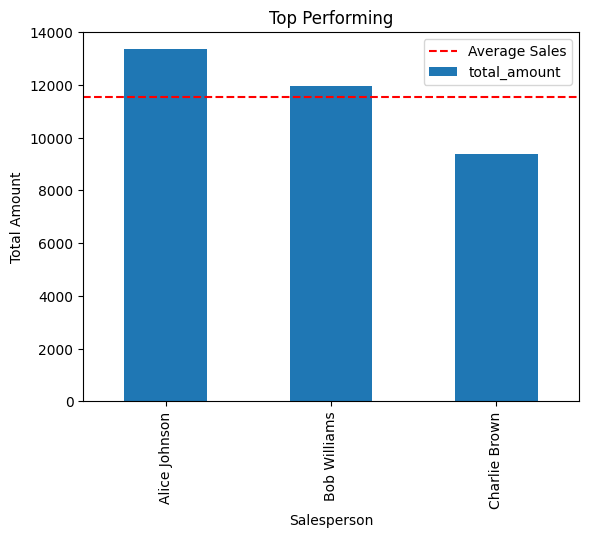

In [6]:
top_performing_salesperson = df.groupby('salesperson')['total_amount'].sum().sort_values(ascending=False)

average_sales_of_person = top_performing_salesperson.mean()

top_performing_salesperson.plot(kind='bar')

plt.axhline(y=average_sales_of_person,color='r',linestyle='--', label='Average Sales')
plt.title('Top Performing')
plt.xlabel('Salesperson')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

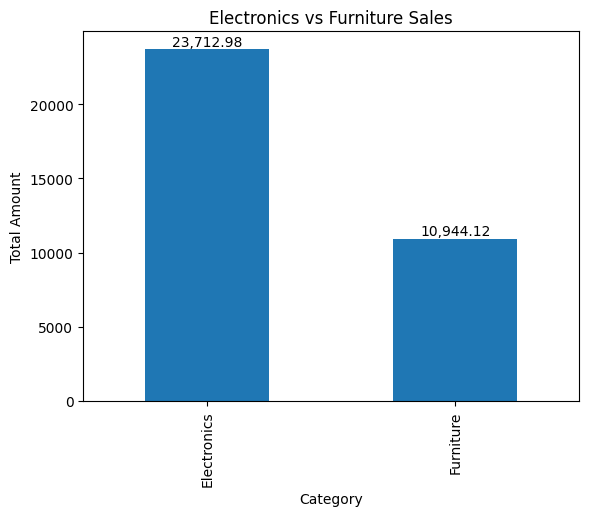

In [7]:
electronics_vs_furniture = df.groupby('category')['total_amount'].sum()


ax = electronics_vs_furniture.plot(kind='bar')
plt.title('Electronics vs Furniture Sales')
plt.xlabel('Category')
plt.ylabel('Total Amount')


for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.2f}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
      
    )

plt.show()

In [8]:
print(df)

    order_id       date         product_name     category  quantity  \
0       1001   1/5/2025         Laptop Pro X  Electronics         2   
1       1002   1/5/2025       Wireless Mouse  Electronics         5   
2       1003   1/6/2025         Office Chair    Furniture         3   
3       1004   1/7/2025            USB-C Hub  Electronics        10   
4       1005   1/7/2025        Standing Desk    Furniture         1   
5       1006   1/8/2025  Mechanical Keyboard  Electronics         4   
6       1007   1/9/2025       Monitor 27inch  Electronics         2   
7       1008  1/10/2025            Desk Lamp    Furniture         8   
8       1009  1/10/2025            Webcam HD  Electronics         6   
9       1010  1/11/2025       Filing Cabinet    Furniture         2   
10      1011  1/12/2025       Headphones Pro  Electronics         3   
11      1012  1/13/2025      Ergonomic Mouse  Electronics        15   
12      1013  1/14/2025          Office Desk    Furniture         1   
13    

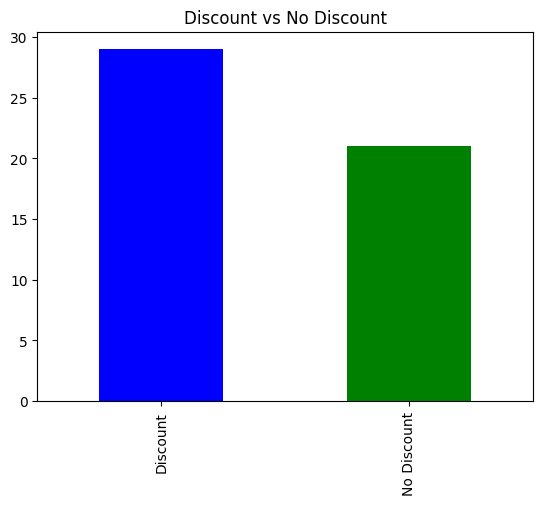

In [9]:
all_item_with_0_discount = df[df['discount_percent'] == 0]
all_item_with_discount = df[df['discount_percent'] > 0 ]

number_of_discount = len(all_item_with_discount)
number_of_0_discount = len(all_item_with_0_discount)

discount_vs_no_discount = pd.Series([number_of_discount, number_of_0_discount],index=['Discount','No Discount'])

discount_vs_no_discount.plot(kind='bar', title='Discount vs No Discount',color=['blue','green'])
plt.show()


In [10]:
# total discount given
df['discount_given'] = (df['total_amount'] * (df['discount_percent'] / 100))

print(f"{df['discount_given'].sum():.2f} given discount total") 

2217.09 given discount total


Create a summary table showing for each region:

Total number of orders
Total sales amount
Average order value

In [11]:
total_number_of_orders = df['order_id'].value_counts().shape[0]
print(f"{total_number_of_orders} total number of order we have")

total_sales_of_all = df['total_amount'].sum()
print(f"Pesos {total_sales_of_all:.2f} total sales of all")

average_order_value = df['total_amount'].mean()
print(f"Pesos {average_order_value:.2f} average order value")

50 total number of order we have
Pesos 34657.10 total sales of all
Pesos 693.14 average order value


In [12]:
best_selling_product = df['product_name'].value_counts().idxmax()
print(f'the best selling product was {best_selling_product}')

the best selling product was Laptop Pro X


In [13]:
corr = df['quantity'].corr(df['total_amount'])
print(f"Correlation: {corr:4f}")

Correlation: -0.104407


In [15]:
correlation_matrix = df[['quantity','unit_price','total_amount','discount_percent']].corr()
print(correlation_matrix)

                  quantity  unit_price  total_amount  discount_percent
quantity          1.000000   -0.537601     -0.104407          0.013300
unit_price       -0.537601    1.000000      0.660045          0.106466
total_amount     -0.104407    0.660045      1.000000          0.259029
discount_percent  0.013300    0.106466      0.259029          1.000000


In [16]:
price_lookup = df.drop_duplicates('product_name')[['product_name','unit_price']]

print(price_lookup)


           product_name  unit_price
0          Laptop Pro X     1299.99
1        Wireless Mouse       29.99
2          Office Chair      199.99
3             USB-C Hub       49.99
4         Standing Desk      499.99
5   Mechanical Keyboard      149.99
6        Monitor 27inch      399.99
7             Desk Lamp       34.99
8             Webcam HD       79.99
9        Filing Cabinet      149.99
10       Headphones Pro      249.99
11      Ergonomic Mouse       59.99
12          Office Desk      349.99
13           Tablet Pro      599.99
14            Bookshelf       89.99
15   Printer All-in-One      299.99
16     Conference Table      899.99
17     External SSD 1TB      129.99
18       Desk Organizer       24.99
19        Smart Speaker       99.99
20           Whiteboard       79.99
21         Laptop Stand       44.99
22      Executive Chair      399.99
23     Wireless Charger       29.99
24           Wall Clock       19.99
25        Graphics Card      549.99
26      Storage Cabinet     

In [17]:
df[df['category'] == 'Electronics']['total_amount'].sum() 

np.float64(23712.98)

region          East    North    South     West
category                                       
Electronics  4799.82  4334.61  8059.22  6519.33
Furniture    4259.73  3914.63   699.97  2069.79


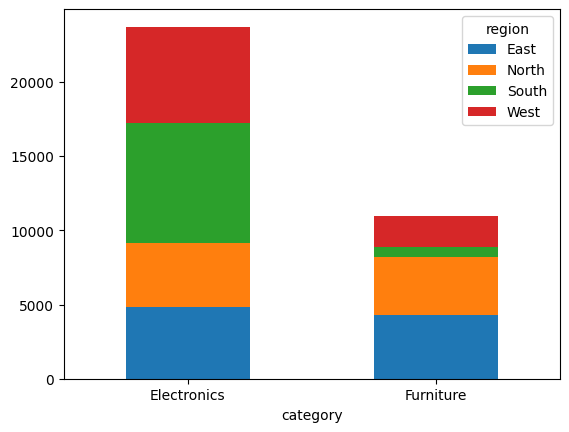

In [25]:
pivot = df.pivot_table(
    values='total_amount',
    index='category',
    columns='region',
    aggfunc='sum'
)
print(pivot)

pivot.plot(kind='bar',stacked=True)
plt.xticks(rotation=0)
plt.show()

In [26]:
filtered = df[
    (df['category'] == 'Electronics') &
    (df['region'] == 'North') &
    (df['discount_percent'] > 0)
]

print(filtered)

    order_id       date    product_name     category  quantity  unit_price  \
8       1009  1/10/2025       Webcam HD  Electronics         6       79.99   
32      1033   2/3/2025  Wireless Mouse  Electronics        12       29.99   
40      1041  2/11/2025       USB-C Hub  Electronics         8       49.99   
48      1049  2/19/2025    Laptop Stand  Electronics        11       44.99   

    total_amount   customer_name region    salesperson payment_method  \
8         479.94  Robert Jackson  North  Alice Johnson    Credit Card   
32        359.88  Patrick Wilson  North  Alice Johnson    Credit Card   
40        399.92   Ryan Thompson  North   Bob Williams    Credit Card   
48        494.89    Kenneth King  North  Charlie Brown    Credit Card   

    discount_percent status  discount_given  
8                 10    Low         47.9940  
32                10    Low         35.9880  
40                 5    Low         19.9960  
48                 5    Low         24.7445  


In [ ]:
total_sales = df['total_amount'].sum()
sales_by_person = df.groupby('salesperson')['total_amount'].sum()
percentage = (sales_by_person / total_sales * 100).round(2)
print(percentage)



salesperson
Alice Johnson    38.49
Bob Williams     34.48
Charlie Brown    27.03
Name: total_amount, dtype: float64


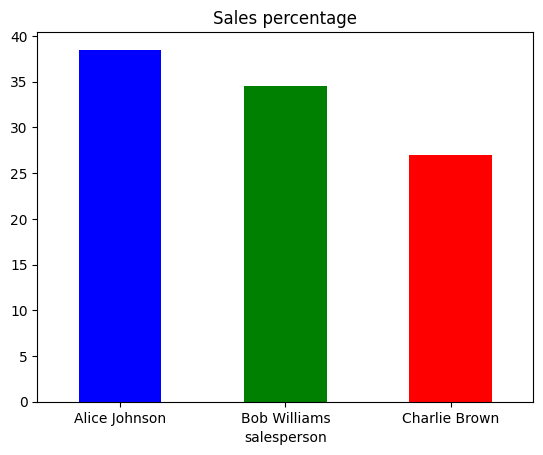

AttributeError: 'Series' object has no attribute 'patches'

In [ ]:
percentage.plot(kind='bar',color=['blue','green','red',],title='Sales percentage')


for p in percentage.patches:
    percentage.annotate(
        f'{p.get_height():,.2f}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
    )
.xticks(rotation=0)
.show()